# Problem Set 3, due February 5 at 5:30 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours trying to make various versions import for grading.

In [373]:
#
# Student Name - Charudatta Deshpande
#
# Collaborators - Ram Ganesan, Charles Hemstreet, Mehdi Muntazir, 
# Manas Thakre
#
#############################################
# Import required libraries.                # 
#############################################
#
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split
import itertools
from itertools import islice
import random

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [374]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [375]:
print (bdata.keys())
print (bdata.feature_names)
print (bdata.data.shape)
print (bdata.target.shape)
# uncomment the following if you want to see a lengthy description 
# of the dataset
print (bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

##Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


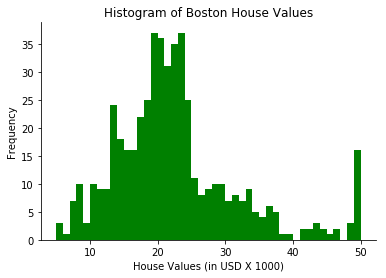

In [376]:
# prepare your jupyter notebook to work with matplotlib and import the library 
#to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
# plt.hist(bdata.target)
#
# Q 1.1.1 Add appropriate labels to the x and y axes, make sure to include units
# 
fig, ax = plt.subplots()
plt.title("Histogram of Boston House Values")
plt.xlabel("House Values (in USD X 1000)")
plt.ylabel("Frequency")
#
# Q 1.1.2 Change the bin width on the histogram to be $1000
# 
number_of_bins = bdata.target.max() - bdata.target.min()
#
# Q 1.1.3 Remove the axes on the top and right side of the plot window
# 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#
# Q 1.1.4 Change the color of the bars to be green, and remove the 
# black borders from the bars
# 
ax.hist(bdata.target, bins=int(number_of_bins), color='green', edgecolor = 'none')
plt.show()

###1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


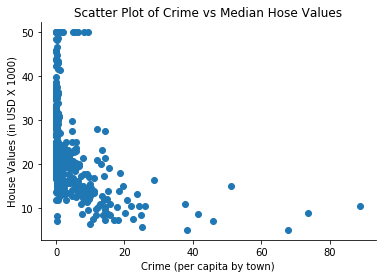

In [377]:
#
# Q 1.2 Convert to a pandas dataframe
#
boston = pd.DataFrame(bdata.data, columns= bdata['feature_names'])
boston['target'] = pd.Series(bdata.target)
#
# Create a scatter plot, remove top and right axes
# use correct labels. 
#
fig, ax1 = plt.subplots()
plt.title("Scatter Plot of Crime vs Median Hose Values")
plt.xlabel("Crime (per capita by town)")
plt.ylabel("House Values (in USD X 1000)")
plt.scatter(boston.CRIM, boston.target)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.show()
#
# Interpretations from Q 1.2 
#
# The scatter plot clearly shows a relationship between crime and 
# house prices.
# In general, more the crime, less the house value. 
#

###1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

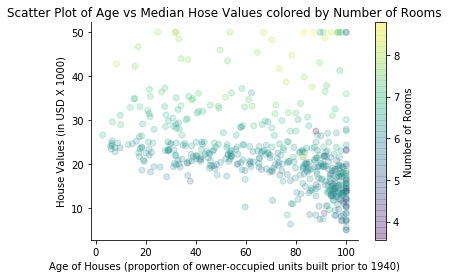

In [378]:
#
# Q 1.3 Create a visualization of average number of rooms 
# vs median house prices. 
#
fig, ax2 = plt.subplots()
plt.title("Scatter Plot of Age vs Median Hose Values colored by Number of Rooms")
plt.xlabel("Age of Houses (proportion of owner-occupied units built prior to 1940)")
plt.ylabel("House Values (in USD X 1000)")
#
plt.scatter(boston.AGE, boston.target, alpha=0.2,
            c=boston.RM, cmap='viridis')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
cbar= plt.colorbar()
cbar.set_label("Number of Rooms", labelpad=+5)
plt.show()
#
# Interpretation of Q 1.3 visualization
#
# We can see that as the age of the houses in the neighborhood increases,the
# overall house value goes down. Also, as number of rooms increases, the
# house value increases.
#

---

##Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

###2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [411]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.16
"""
def compute_rmse(predictions, yvalues):
    # Code begins here. 
    rmse = np.sqrt(((predictions - yvalues) ** 2).mean())
    return rmse
#
# Calculate RMSE for above specified arrays. 
#
a = [2,2,3]
b = [0,2,6]
print("Calculated RMSE is : ", compute_rmse(np.array(a), np.array(b)))
    

Calculated RMSE is :  2.08166599947


###2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [430]:
# leave the following line untouched, it will help ensure that your "random" split 
# is the same "random" split used by the rest of the class
#
np.random.seed(seed=13579)
boston['rand'] = boston.apply(lambda row: random.random(), axis=1)
boston['train'] = (boston['rand']<=.66)
boston['test'] = (boston['rand']>.66) 
bdata_train = boston[boston['train']]
bdata_test = boston[boston['test']]
print("Number of records in Boston dataset: ", len(boston))
print("Number of records in Boston testing dataset: ", len(bdata_test))
print("Number of records in Boston training dataset: ", len(bdata_train))
bdata_train = bdata_train.drop('rand',axis=1)
bdata_train = bdata_train.drop('train',axis=1)
bdata_train = bdata_train.drop('test',axis=1)
#
bdata_test = bdata_test.drop('rand',axis=1)
bdata_test = bdata_test.drop('train',axis=1)
bdata_test = bdata_test.drop('test',axis=1)
#
boston = boston.drop('rand',axis=1)
boston = boston.drop('train',axis=1)
boston = boston.drop('test',axis=1)
#
# Check number of records in each set. 
#

Number of records in Boston dataset:  506
Number of records in Boston testing dataset:  168
Number of records in Boston training dataset:  338


###2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [431]:
# enter your code here
#
# Create a model that predicts that the median home value is the 
# average (mean) of the median values. 
#
pd.options.mode.chained_assignment = None  # default='warn'
bdata_train['bad_model_pred_value'] = np.mean(bdata_train.target)
#
# Calculate RMSE on this training set 
# 
print("Calculated RMSE on training dataset is: ", 
      compute_rmse(bdata_train.bad_model_pred_value, bdata_train.target))
#
# Do the above process on test data
# 
bdata_test['bad_model_pred_value'] = np.mean(bdata_test.target)
print("Calculated RMSE on testing dataset is: ", 
      compute_rmse(bdata_test.bad_model_pred_value, bdata_test.target))

Calculated RMSE on training dataset is:  9.56999438606
Calculated RMSE on testing dataset is:  8.31769893939


*Enter your observations here*              
Charu's answer - 

The RMSE value is quite large for both training and testing datasets,
and very close. This is expected given how bad our model is. 
RMSE for test dataset is slightly lower than training data. 
That is also expected because of larger size of training data. 
Because of larger size, the model is worse on the training data as there are
larger daviations from actual values. 

---

##Part 3: Nearest Neighbors


###3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [432]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
7

"""
def distance(x1, x2, L):
    mse = np.power(np.absolute(np.subtract(x1, x2)),L)
    sum_mse = np.sum(mse)
    dist = np.power(sum_mse, (1/L))
    return dist
# 
# Note - L-norm distance = Euclidean distance when L = 2
# For other values of L, see wikipedia. 
#
# Calculate above distance in 2 dimensions 
# L = 2 so it is Euclidean distance
# 
print("The distance between given points is: ", distance([3,4],[6,8],2))
#
# Test in 3 dimensions. 
# L = 2 so it is Euclidean distance
# 
print("The distance between given points is: ", distance([-1,2,3],[4,0,-3],2))
# 

The distance between given points is:  5.0
The distance between given points is:  8.0622577483


###3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [433]:
"""
# write your function specification here!
# Charu's response - 
# We will first create new training and testing datasets with only 
# CRIM, RM and target as data. Other columns will be dropped. 
# We will then compare CRIM and RM from test dataset to each 
# record in the training dataset and return the 'target' value for the
# closest instance from the training dataset. 
# based on predicted values and actual values, we will then calculate the 
# RMSE. 
"""
#
# Only copy data being used for analysis. 
#
bdata_train_new = bdata_train[['CRIM', 'RM', 'target']]
bdata_test_new = bdata_test[['CRIM', 'RM', 'target']]
#
import time
import operator 

def nneighbor(train_data, test_data, L):
    start_time = time.time()
    # Charu's code begins here
    actual = []    
    predicted = []
    for x in range(len(test_data)):
        distances = []
        for y in range(len(train_data)):
            dist = distance(test_data[x][0:2], train_data[y][0:2], L)
            distances.append((test_data[x], train_data[y], [dist]))
            distances.sort(key=operator.itemgetter(2))             
        z = distances[0]
        merged = list(itertools.chain(*z))
        actual.append([merged[2]])
        predicted.append([merged[5]])        
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return actual, predicted
#
# your additional code here
#
# Test the function on simple data
# 
train_data = [[2, 2, 2], [4, 4, 4], [5, 5, 4]]
test_data =  [[5, 5, 5], [4, 4, 4]]
L = 2
actual, predicted = nneighbor(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
print("actual: ", actual_merged)
print("predicted: ", predicted_merged)
#
# Now actually use the training and testing dataset and see the results
#
train_data = bdata_train_new.values
test_data = bdata_test_new.values
L = 2
actual, predicted = nneighbor(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on Nearest Neighbor algorithm is: ", 
      compute_rmse(predicted_array, actual_array))
#
# Note - Look at printed values below. 
#

Time taken: 0.0 seconds
actual:  [5, 4]
predicted:  [4, 4]
Time taken: 1.57 seconds
Calculated RMSE on Nearest Neighbor algorithm is:  6.29328818588


###3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [434]:
"""
# write your function specification here!
# Charu's response - 
# We will write a function to normalize an array. 
# Formula - 
# Normalized value = (original value - mean)/(max value - min value)
#
"""
def normalize(raw_data):
    # Charu's code begins here
    normalized_data = (raw_data-np.mean(raw_data))/np.ptp(raw_data)
    return normalized_data
#
# your additional code here
# 
# test on a very small array
#
a = [5, 5, 4]
normalized_data = normalize(a)
print("Test data normalized: ", normalized_data)
#
# Now actually use the training and testing dataset and see the results
#
bdata_train['CRIM_normalized'] = normalize(bdata_train['CRIM'])
bdata_train['RM_normalized'] = normalize(bdata_train['RM'])
bdata_train['AGE_normalized'] = normalize(bdata_train['AGE'])
bdata_train['DIS_normalized'] = normalize(bdata_train['DIS'])
#
bdata_test['CRIM_normalized'] = normalize(bdata_test['CRIM'])
bdata_test['RM_normalized'] = normalize(bdata_test['RM'])
bdata_test['AGE_normalized'] = normalize(bdata_test['AGE'])
bdata_test['DIS_normalized'] = normalize(bdata_test['DIS'])

#
bdata_train_new1 = bdata_train[['CRIM_normalized', 'RM_normalized', 'target']]
bdata_test_new1 = bdata_test[['CRIM_normalized', 'RM_normalized', 'target']]
train_data = bdata_train_new1.values
test_data = bdata_test_new1.values
L = 2
actual, predicted = nneighbor(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on normalized Nearest Neighbor algorithm is: ", 
      compute_rmse(predicted_array, actual_array))
#
# Note - Look at printed values below. 
#

Test data normalized:  [ 0.33333333  0.33333333 -0.66666667]
Time taken: 1.54 seconds
Calculated RMSE on normalized Nearest Neighbor algorithm is:  8.26826981383


*enter your observations here*
     
Charu's answer - 

The RMSE value is quite large for non-normalized array - Refer above.          
        
The RMSE value for normalized array is similar - Refer above. 

This indicates that normalizing array does not improve the accuracy
of this very basic model. 

###3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [437]:
#
# Sub question 1
#
# First, try a model that uses 2 different features. 
# We will select AGE and DIS. 
# AGE = proportion of owner-occupied units built prior to 1940
# DIS = weighted distances to five Boston employment centres
#
bdata_train_new2 = bdata_train[['AGE_normalized', 'DIS_normalized', 'target']]
bdata_test_new2= bdata_test[['AGE_normalized', 'DIS_normalized', 'target']]
train_data = bdata_train_new2.values
test_data = bdata_test_new2.values
L = 2
actual, predicted = nneighbor(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on Nearest Neighbor algorithm using  AGE and DIS is: ", 
      compute_rmse(predicted_array, actual_array))
#
# Note - Look at printed values below. 
#


Time taken: 1.56 seconds
Calculated RMSE on Nearest Neighbor algorithm using  AGE and DIS is:  11.8273794545


*enter your observations here*
     
Charu's answer - 

The RMSE value using 4 features is:  Refer above. This is slightly 
better than the above 2 models. Still this is a very basic model. 


In [438]:
#
# Sub question 2
#
# Second, try a model that uses 4 different features. 
# We will select CRIM, RM, AGE and DIS. 
# This is just a combination of 2 models above. 
# Since our model is hard coded for position of data, we need to
# make modifications to it 
#
# Modified model
#
def nneighbor1(train_data, test_data, L):
    start_time = time.time()
    # Charu's code begins here
    actual = []    
    predicted = []
    for x in range(len(test_data)):
        distances = []
        for y in range(len(train_data)):
            dist = distance(test_data[x][0:4], train_data[y][0:4], L)
            distances.append((test_data[x], train_data[y], [dist]))
            distances.sort(key=operator.itemgetter(2))    
        z = distances[0]
        merged = list(itertools.chain(*z))
        actual.append([merged[4]])
        predicted.append([merged[9]])        
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return actual, predicted
# 
bdata_train_new3 = bdata_train[['CRIM_normalized', 'RM_normalized', 
                                'AGE_normalized', 'DIS_normalized', 'target']]
bdata_test_new3 = bdata_test[['CRIM_normalized', 'RM_normalized', 
                              'AGE_normalized', 'DIS_normalized', 'target']]
train_data = bdata_train_new3.values
test_data = bdata_test_new3.values
L = 2
actual, predicted = nneighbor1(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on Nearest Neighbor algorithm using 4 features is: ", 
      compute_rmse(predicted_array, actual_array))
#
# Note - Look at printed values below. 
#

Time taken: 1.56 seconds
Calculated RMSE on Nearest Neighbor algorithm using 4 features is:  7.41831709833


In [439]:
#
# Sub question 3
#
# Third, use an L value of 1 and 3 and see what happens. 
# Use the 4 feature model. 
#
bdata_train_new3 = bdata_train[['CRIM_normalized', 'RM_normalized', 
                                'AGE_normalized', 'DIS_normalized', 'target']]
bdata_test_new3 = bdata_test[['CRIM_normalized', 'RM_normalized', 
                              'AGE_normalized', 'DIS_normalized', 'target']]
train_data = bdata_train_new3.values
test_data = bdata_test_new3.values
L = 1
actual, predicted = nneighbor1(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on Nearest Neighbor algorithm using L = 1 is: ", 
      compute_rmse(predicted_array, actual_array))
#
L = 3
actual, predicted = nneighbor1(train_data, test_data, L)
actual_merged = list(itertools.chain(*actual))
predicted_merged = list(itertools.chain(*predicted))
actual_array = np.asarray(actual_merged)
predicted_array = np.asarray(predicted_merged)
print("Calculated RMSE on Nearest Neighbor algorithm using L = 3 is: ", 
      compute_rmse(predicted_array, actual_array))
#
# Note - Look at printed values below. 
#

Time taken: 1.55 seconds
Calculated RMSE on Nearest Neighbor algorithm using L = 1 is:  7.5535548238
Time taken: 1.56 seconds
Calculated RMSE on Nearest Neighbor algorithm using L = 3 is:  7.39954149159


*enter your observations here*
     
Charu's answer - 

The RMSE value using different values of L are not very different. 
Still this is an inefficient model. 

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [479]:
from random import seed
from random import randrange
seed(1458)
#
# Split a dataset into k folds
#
def cross_validation_split(dataset, folds=3):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
#
# Now we have an item, 'folds', which has k arrays of the data 
#
def cross_validation_perform(folds, k):
    rmse = 0
    for x in range(k):
        train_data_unmerge = np.delete(folds, x, 0)
        test_data = folds[x]
        train_data = list(itertools.chain(*train_data_unmerge))
        actual, predicted = nneighbor(train_data, test_data, L)
        actual_merged = list(itertools.chain(*actual))
        predicted_merged = list(itertools.chain(*predicted))
        actual_array = np.asarray(actual_merged)
        predicted_array = np.asarray(predicted_merged)
        print("Calculated RMSE for iteration number ", x, " is: ", 
              compute_rmse(predicted_array, actual_array))
        rmse = rmse + compute_rmse(predicted_array, actual_array)
    return rmse/k
#
# Now we have both functions defined. Split and cross validation
# Now prep actual data and perform both functions. 
# 
boston['CRIM_normalized'] = normalize(boston['CRIM'])
boston['RM_normalized'] = normalize(boston['RM'])
boston_fold = boston[['CRIM_normalized', 'RM_normalized', 'target']]
dataset = boston_fold.values
k = 10
L = 2
folds = cross_validation_split(dataset, k)
mean_rmse = cross_validation_perform(folds, k)
print("Calculated mean RMSE on Nearest Neighbor algorithm using CRIM, RM is: ", mean_rmse)

Time taken: 0.71 seconds
Calculated RMSE for iteration number  0  is:  4.5829030101
Time taken: 0.74 seconds
Calculated RMSE for iteration number  1  is:  5.48938976572
Time taken: 0.72 seconds
Calculated RMSE for iteration number  2  is:  7.33158918653
Time taken: 0.7 seconds
Calculated RMSE for iteration number  3  is:  9.87846141866
Time taken: 0.72 seconds
Calculated RMSE for iteration number  4  is:  7.68492029887
Time taken: 0.71 seconds
Calculated RMSE for iteration number  5  is:  7.020697971
Time taken: 0.72 seconds
Calculated RMSE for iteration number  6  is:  8.11607047776
Time taken: 0.73 seconds
Calculated RMSE for iteration number  7  is:  7.32117476912
Time taken: 0.71 seconds
Calculated RMSE for iteration number  8  is:  5.69424270645
Time taken: 0.71 seconds
Calculated RMSE for iteration number  9  is:  8.88551630464
Calculated mean RMSE on Nearest Neighbor algorithm using CRIM, RM is:  7.20049659089


###3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [525]:
"""
# write your function specification here!
# Charu's response - 
# We do the same thing that we did above, but now we only
# introduce K, which is number of nearest neighbors. 
# It is not specified what input variables are to be used. 
# We will continue to use CRIM and RM. 
#
"""
constant_array = [5,12,19,26,33,40,47,54,61,68,75,82,89,96,103,110,117,124,131,138,145,152,159,166,173]
def knn(train_data, test_data, L, K):
    sub_array = constant_array[0:K] 
    # Charu's code begins here
    actual = []    
    predicted = []
    for x in range(len(test_data)):
        distances = []
        for y in range(len(train_data)):
            dist = distance(test_data[x][0:2], train_data[y][0:2], L)
            distances.append((test_data[x], train_data[y], [dist]))
            distances.sort(key=operator.itemgetter(2))                
        z = []
        for w in range(K):
            z.append(distances[w])        
        merged = list(itertools.chain(*z))
        merged_again = list(itertools.chain(*merged))
        actual.append([merged_again[2]])
        counter = 0
        for q in range(K):
            counter = counter + merged_again[sub_array[q]] 
        predicted_mean = counter/K                
        predicted.append([predicted_mean])  
    return actual, predicted
#
# enter your additional code here
# Continued below. 

In [526]:
#
# Now we need to rewrite cross validation to account for K
#
def cross_validation_perform_K(folds, k):
    rmse = 0
    for x in range(k):
        train_data_unmerge = np.delete(folds, x, 0)
        test_data = folds[x]
        train_data = list(itertools.chain(*train_data_unmerge))
        actual, predicted = knn(train_data, test_data, L, K)
        actual_merged = list(itertools.chain(*actual))
        predicted_merged = list(itertools.chain(*predicted))
        actual_array = np.asarray(actual_merged)
        predicted_array = np.asarray(predicted_merged)
        rmse = rmse + compute_rmse(predicted_array, actual_array)
    return rmse/k
#
# Now we have both functions defined. Split and cross validation
# Now prep actual data and perform both functions. 
# 
dataset = boston_fold.values
k = 10
L = 2
K = 3
start_time = time.time()
folds = cross_validation_split(dataset, k)
mean_rmse = cross_validation_perform_K(folds, k)
print("Calculated mean RMSE on Nearest Neighbor algorithm using K = " ,K, "is: ", mean_rmse)
print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
#
# Refer below for calculated values and time
#

Calculated mean RMSE on Nearest Neighbor algorithm using K =  3 is:  5.78383656511
Time taken: 7.22 seconds


###3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [536]:
#
# Rewrite the function to accommodate extra features
#
constant_array = [13,28,43,58,73,88,103,118,133,148,163,178,193,208,223,238,253,268,283,298,313,328,343,358,373]
def knn(train_data, test_data, L, K):
    sub_array = constant_array[0:K] 
    # Charu's code begins here
    actual = []    
    predicted = []
    for x in range(len(test_data)):
        distances = []
        for y in range(len(train_data)):
            dist = distance(test_data[x][0:6], train_data[y][0:6], L)
            distances.append((test_data[x], train_data[y], [dist]))
            distances.sort(key=operator.itemgetter(2))                
        z = []
        for w in range(K):
            z.append(distances[w])        
        merged = list(itertools.chain(*z))
        merged_again = list(itertools.chain(*merged))
        #print("merged again: ", merged_again)
        actual.append([merged_again[6]])
        counter = 0
        for q in range(K):
            counter = counter + merged_again[sub_array[q]] 
        predicted_mean = counter/K        
        predicted.append([predicted_mean])  
    return actual, predicted
#
# Continued below. 
#
boston['ZN_normalized'] = normalize(boston['ZN'])
boston['AGE_normalized'] = normalize(boston['AGE'])
boston['DIS_normalized'] = normalize(boston['DIS'])
boston['TAX_normalized'] = normalize(boston['TAX'])
boston_fold1 = boston[['CRIM_normalized', 'ZN_normalized','RM_normalized', 
                      'AGE_normalized','DIS_normalized', 'TAX_normalized',
                      'target']]
dataset = boston_fold1.values
k = 10
L = 2
start_time = time.time()
folds = cross_validation_split(dataset, k)
grand_mean_rmse = []
for K in range(1,26):
    mean_rmse = cross_validation_perform_K(folds, k)
    grand_mean_rmse.append(mean_rmse)
    print("Calculated mean RMSE on Nearest Neighbor algorithm using K = " ,K, "is: ", mean_rmse)
print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
print(" Grand RMSE array is: ", grand_mean_rmse)
#
# Refer below for calculated values and time
#

Calculated mean RMSE on Nearest Neighbor algorithm using K =  1 is:  5.69330142236
Calculated mean RMSE on Nearest Neighbor algorithm using K =  2 is:  5.32356266795
Calculated mean RMSE on Nearest Neighbor algorithm using K =  3 is:  5.20404571983
Calculated mean RMSE on Nearest Neighbor algorithm using K =  4 is:  5.11481888949
Calculated mean RMSE on Nearest Neighbor algorithm using K =  5 is:  5.21091856886
Calculated mean RMSE on Nearest Neighbor algorithm using K =  6 is:  5.23350820201
Calculated mean RMSE on Nearest Neighbor algorithm using K =  7 is:  5.25695962631
Calculated mean RMSE on Nearest Neighbor algorithm using K =  8 is:  5.27026159586
Calculated mean RMSE on Nearest Neighbor algorithm using K =  9 is:  5.37404696813
Calculated mean RMSE on Nearest Neighbor algorithm using K =  10 is:  5.4366381314
Calculated mean RMSE on Nearest Neighbor algorithm using K =  11 is:  5.46894198504
Calculated mean RMSE on Nearest Neighbor algorithm using K =  12 is:  5.51938522203
Ca

*Enter your observations here*

See at the end   

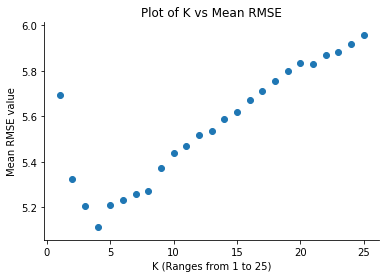

In [538]:
#
# Create a plot of K vs RMSE
#
grand_K = []
for K in range(1,26):
    grand_K.append(K)
fig, ax5 = plt.subplots()
plt.title("Plot of K vs Mean RMSE")
plt.xlabel("K (Ranges from 1 to 25)")
plt.ylabel("Mean RMSE value")
plt.scatter(grand_K, grand_mean_rmse)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
plt.show()


#### *Enter your observations here*

Charu's response -     
         
As can be seen, mean RMSE gradually improves until K reaches 4, then RMSE goes down 
as K increases. 

Based on above graph, optimum value of K is 4.    